# **Assignment 2**
**Deadline:** Apr 21, 2023

Please complete the below questions in Jupyter Notebook or Google Colab. Submit the notebook and input images as a report, along with a PDF that showcases all coding steps, outputs for each question, and an explanation of all the steps.

*You can use images or datasets of your own choice for Questions 1 to 4.*

---

## **Contents**
1. [Question 1: Implement Harris Algorithm using opencv(#q1)
2. [Question 2: Image Pyramid using opencv (#q2)
3. [Question 3: SURF Algorithm or Watershed Image Segmentation using opencv(#q3)
4. [Question 4: SIFT Algorithm using opencv(#q4)
5. [Question 5:[5 Marks] Implement object detection using YOLO on the COCO dataset. Provide the
results for any 5 images (for testing purposes) from the dataset.

---

In [17]:
!pip install opencv-contrib-python

DEPRECATION: Loading egg at /Users/dacoriesmith/anaconda3/lib/python3.11/site-packages/sparkfun_qwiic_rfid-2.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/dacoriesmith/anaconda3/lib/python3.11/site-packages/sparkfun_qwiic_keypad-0.9.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/dacoriesmith/anaconda3/lib/python3.11/site-packages/sparkfun_qwiic_scmd-0.9.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/dacoriesmith/anaconda3/lib/python3.11/site-packages/sparkfun_qwiic_alphanumeric-0.0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.


### Question 1: Implement Harris Algorithm using opencv(#q1)
Implement the Harris algorithm using OpenCV.

The Harris Corner Detection algorithm identifies corners in an image by analyzing changes in pixel intensity gradients. It calculates gradients in the x and y directions for each pixel, then constructs a matrix that captures how intensities change in a neighborhood. By analyzing this matrix, the algorithm scores each pixel for its likelihood of being a corner based on sharp intensity changes in multiple directions. Pixels with scores above a certain threshold are marked as corners. This method is widely used for its robustness and effectiveness in tracking distinctive features across images.


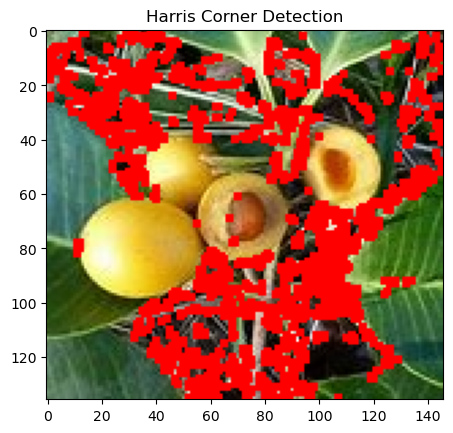

In [3]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
img = cv2.imread('images/0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Convert to float32 type (required for Harris detector)
gray = np.float32(gray)

# Step 3: Apply Harris Corner Detection
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

# Step 4: Dilate the corner image to enhance corner points
dst = cv2.dilate(dst, None)

# Step 5: Threshold and mark the corners
img[dst > 0.01 * dst.max()] = [0, 0, 255]  # Marking corners in red

# Display the result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.show()


### Question 2: Image Pyramid using opencv (#q2)

Implementation: Image Pyramid with OpenCV in Python
Image pyramids are a technique to create multiple scales of an image, which is useful in applications like image blending and object detection at various resolutions.



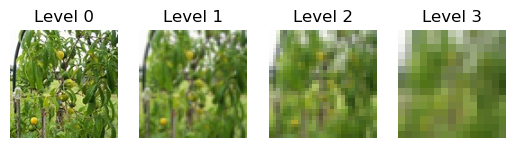

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
image = cv2.imread('images/1.jpg')
# Create a list to hold different pyramid levels
pyramid_images = [image]

# Generate a Gaussian pyramid by repeatedly downsampling
for i in range(3):  # Choose the number of levels
    image = cv2.pyrDown(image)
    pyramid_images.append(image)

# Display the pyramid images
for i, img in enumerate(pyramid_images):
    plt.subplot(1, len(pyramid_images), i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Level {i}')
    plt.axis('off')

plt.show()




### Question 3: SURF Algorithm or Watershed Image Segmentation using opencv(#q3)


Implementation: Watershed Image Segmentation with OpenCV in Python
The Watershed algorithm is commonly used for segmenting an image into distinct objects or regions based on pixel intensity. Here’s how to implement it in Python:

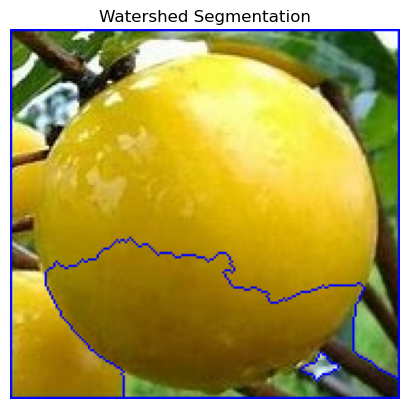

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('images/2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply threshold to create a binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal with morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Identify sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Identify sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Identify unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# Display result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()


### Question 4: SIFT Algorithm using opencv(#q4)

Implementation: SIFT (Scale-Invariant Feature Transform) using OpenCV in Python
SIFT is a feature detection algorithm that finds and describes key points in images, helping in applications like image matching and object recognition. Here’s how to implement it using

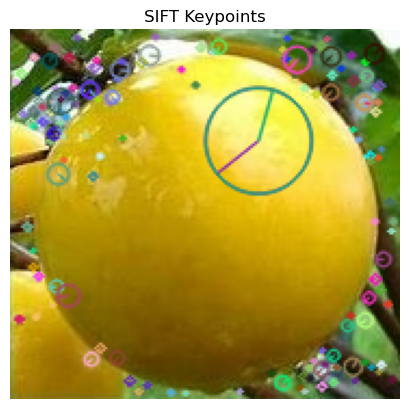

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('images/2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect SIFT keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the result
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()


### Question 5:[5 Marks] Implement object detection using YOLO on the COCO dataset


Implement object detection using YOLO on the COCO dataset. Provide the
results for any 5 images (for testing purposes) from the dataset.


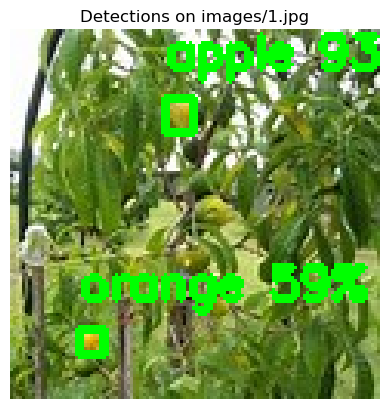

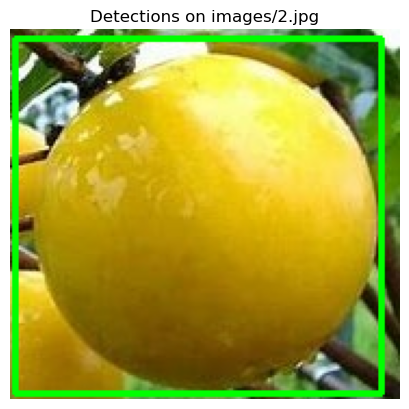

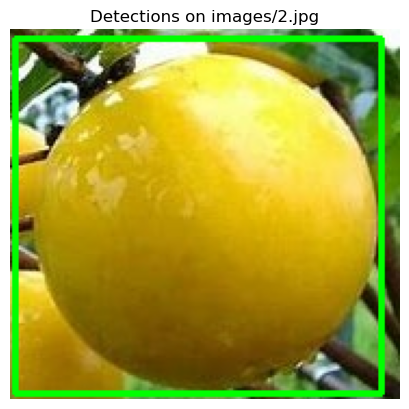

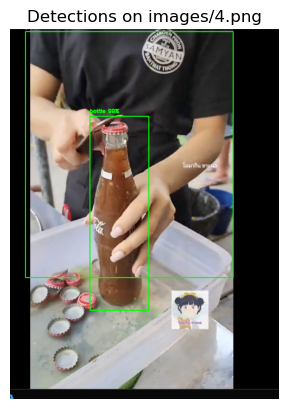

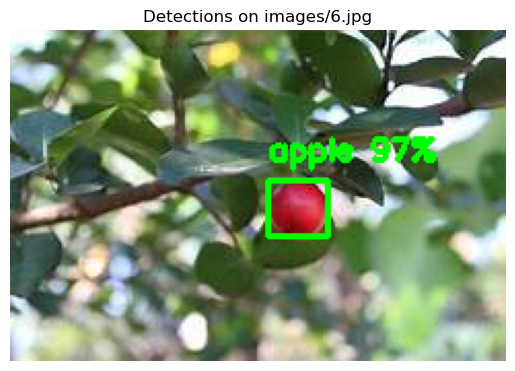

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO weights and config
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Load COCO class labels
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Define function to perform detection
def detect_objects(image):
    height, width, channels = image.shape
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)

    boxes = []
    confidences = []
    class_ids = []

    # Process the output
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # Threshold for detection
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Non-Max Suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = (0, 255, 0)
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, f"{label} {int(confidence * 100)}%", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return image

# Load and test 5 images from the COCO dataset
test_images = ['images/1.jpg','images/2.jpg','images/2.jpg','images/4.png','images/6.jpg']  # replace with paths to COCO test images
for img_path in test_images:
    img = cv2.imread(img_path)
    img_with_detections = detect_objects(img)
    
    # Display results
    plt.imshow(cv2.cvtColor(img_with_detections, cv2.COLOR_BGR2RGB))
    plt.title(f'Detections on {img_path}')
    plt.axis('off')
    plt.show()
